(506, 13)


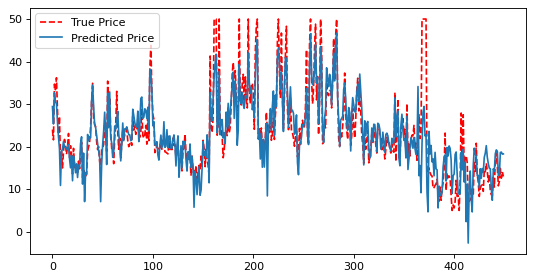

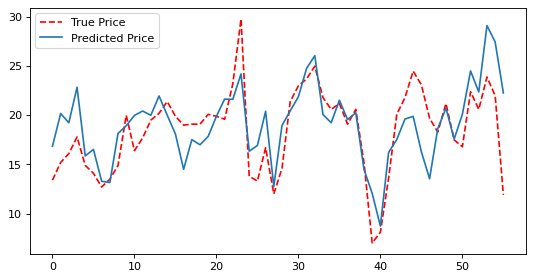

[ 8.75581263e+00 -8.87849885e+01  1.72427679e+01  3.64329198e+01
  1.21348024e+03 -6.59623282e+03  2.74334794e+03  3.60235103e+00
 -5.47021446e+02  1.45538751e+02  1.79720041e+00 -3.80405490e+02
  9.78240914e+00 -2.57733536e+02]

Network weights:  [ 8.75581263e+00 -8.87849885e+01  1.72427679e+01  3.64329198e+01
  1.21348024e+03 -6.59623282e+03  2.74334794e+03  3.60235103e+00
 -5.47021446e+02  1.45538751e+02  1.79720041e+00 -3.80405490e+02
  9.78240914e+00 -2.57733536e+02]
The input with the highest weight is at index:  5


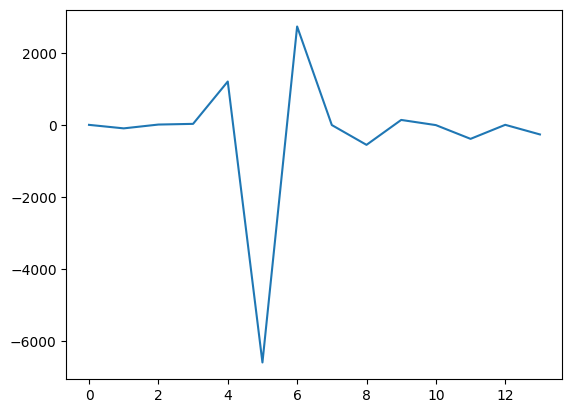

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import warnings

# Step 2: Read data as array
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Step 3: Normalize Data
data = normalize(data, norm='l2')

# Step 4: Split data into target and input
X = data[:,:13]  #input
y = target  #target
print(X.shape)

# Step 5: Add bias
X_b = np.column_stack((np.ones((506, 1)), X))

# rearrange data
y = y.T
xTrain = X_b[:450,:]
yTrain = y[:450]

xTest = X_b[-56:,:]
yTest = y[-56:]

# Step 6: Use the formula to calculate slope (m) using only training data
a = np.linalg.inv((xTrain.T).dot(xTrain))
b = (xTrain.T).dot(yTrain)
m = a.dot(b)

# Step 7: Compute prediction on train data
yTr_pred = xTrain.dot(m)   # predicting the price (or testing the trained model) using equation, y = mx

# Plotting
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(yTrain, 'r--', yTr_pred)
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

# Step 8: Repeat Step 7 for testing data and plot output
yTest_pred = xTest.dot(m)
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(yTest, 'r--', yTest_pred)
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

plt.plot(m)
print(m)

print()

# Print network weights
print("Network weights: ", m)

# Identify the input with the highest weight
max_weight_index = np.argmax(np.abs(m))  # use absolute value to consider both positive and negative weights
print("The input with the highest weight is at index: ", max_weight_index)


In [4]:
np.argmax(m)

6